## Data Preprocessing and Filtering





In [ ]:
import pandas as pd

def load_ratings_file(path):
    """
    Loads the ratings dataset from a given file path with error handling.

    Parameters:
    path (str): The file path to the ratings dataset.

    Returns:
    DataFrame: Loaded ratings dataset.
    """
    try:
        ratings = pd.read_csv(path, sep=",", encoding="utf-8", on_bad_lines="skip")
        print("Dataset loaded successfully.")
        return ratings
    except Exception as e:
        print("Error loading dataset:", e)
        return None

In [ ]:
import pandas as pd

def filter_ratings(ratings, M, M_prime):
    """
    Filters the ratings dataset based on the minimum number of ratings per movie (M)
    and the minimum number of ratings per user (M').

    Parameters:
    ratings (DataFrame): The original ratings dataset.
    M (int): Minimum ratings required per movie.
    M_prime (int): Minimum ratings required per user.

    Returns:
    DataFrame: Filtered ratings dataset.
    """

    # Print original dataset size
    print(f"\nOriginal dataset size: {ratings.shape[0]} ratings")

    # Filtering movies with at least M ratings
    movie_counts = ratings['movieId'].value_counts()
    filtered_movies = movie_counts[movie_counts >= M].index
    ratings_filtered_movies = ratings[ratings['movieId'].isin(filtered_movies)]

    print(f"\nAfter filtering movies with at least {M} ratings:")
    print(f"Dataset size: {ratings_filtered_movies.shape[0]} ratings")

    # Filtering users with at least M' ratings
    user_counts = ratings_filtered_movies['userId'].value_counts()
    filtered_users = user_counts[user_counts >= M_prime].index
    ratings_filtered = ratings_filtered_movies[ratings_filtered_movies['userId'].isin(filtered_users)]

 # ✅ Fix the KeyError: Use `len(user_counts)` instead of `user_counts['userId'].nunique()`
    print(f"Before Filtering Users (M'={M_prime}): {len(user_counts)} unique users")
    print(f"After Filtering Users (M'={M_prime}): {ratings_filtered['userId'].nunique()} unique users")

    print(f"\nAfter filtering users with at least {M_prime} ratings:")
    print(f"Dataset size: {ratings_filtered.shape[0]} ratings")

    return ratings_filtered




You have to upload the datset in the colab enviroment


In [ ]:

path = "/content/ratings.csv"
ratings = load_ratings_file(path)

if ratings is not None:
    # Define filtering thresholds
    M = 10  # Minimum ratings per movie
    M_prime = 10  # Minimum ratings per user

    # Apply filtering
    filtered_ratings = filter_ratings(ratings, M, M_prime)

Dataset loaded successfully.

Original dataset size: 100836 ratings

After filtering movies with at least 10 ratings:
Dataset size: 81116 ratings
Before Filtering Users (M'=10): 610 unique users
After Filtering Users (M'=10): 609 unique users

After filtering users with at least 10 ratings:
Dataset size: 81109 ratings


## Implementation of Recommendation Models

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def compute_similarity_matrix(user_item_matrix, similarity_type="cosine"):
    """
    Computes a similarity matrix for movies based on the specified similarity metric.

    Parameters:
    user_item_matrix (DataFrame): User-item matrix with movies as columns.
    similarity_type (str): The similarity metric to use ("cosine" or "pearson").

    Returns:
    DataFrame: Similarity matrix.
    """
    if similarity_type == "cosine":
        similarity_matrix = cosine_similarity(user_item_matrix.T)
    elif similarity_type == "pearson":
        similarity_matrix = user_item_matrix.corr(method='pearson')
    else:
        raise ValueError("Invalid similarity type. Choose 'cosine' or 'pearson'.")

    return pd.DataFrame(similarity_matrix, index=user_item_matrix.columns, columns=user_item_matrix.columns)

In [ ]:
def create_movie_similarity_matrix(ratings, similarity_type="cosine"):
    """
    Creates a movie similarity matrix using user rating data and the specified similarity metric.

    Parameters:
    ratings (DataFrame): Filtered ratings dataset.
    similarity_type (str): The similarity metric to use ("cosine" or "pearson").

    Returns:
    DataFrame: Movie similarity matrix.
    """
    # Create user-item matrix (movies as columns, users as rows)
    user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

    # Compute similarity matrix using selected method
    movie_similarity_df = compute_similarity_matrix(user_item_matrix, similarity_type)

    return movie_similarity_df


In [ ]:
# Compute similarity matrices
cosine_similarity_matrix = create_movie_similarity_matrix(filtered_ratings, "cosine")
pearson_similarity_matrix = create_movie_similarity_matrix(filtered_ratings, "pearson")

# Display sample results
print("\nCosine Similarity Matrix (Sample):")
display(cosine_similarity_matrix.head())

print("\nPearson Similarity Matrix (Sample):")
display(pearson_similarity_matrix.head())


Cosine Similarity Matrix (Sample):


movieId,1,2,3,5,6,7,9,10,11,12,...,166461,166528,166643,168250,168252,174055,176371,177765,179819,187593
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.410562,0.296917,0.308762,0.376316,0.277491,0.232586,0.395573,0.323976,0.219680,...,0.066689,0.174998,0.162958,0.106232,0.169289,0.128873,0.140250,0.068119,0.116364,0.095825
2,0.410562,1.000000,0.282438,0.287795,0.297009,0.228576,0.044835,0.417693,0.322252,0.168642,...,0.092751,0.233863,0.096540,0.095374,0.256621,0.112057,0.203355,0.037398,0.154905,0.162151
3,0.296917,0.282438,1.000000,0.417802,0.284257,0.402831,0.304840,0.242954,0.249568,0.203237,...,0.000000,0.056977,0.052839,0.012543,0.054778,0.081208,0.078187,0.000000,0.060823,0.000000
5,0.308762,0.287795,0.417802,1.000000,0.298969,0.474002,0.335058,0.218061,0.272182,0.207889,...,0.060572,0.061720,0.029112,0.036859,0.033018,0.034417,0.045416,0.000000,0.033512,0.000000
6,0.376316,0.297009,0.284257,0.298969,1.000000,0.244105,0.214088,0.386414,0.289365,0.168019,...,0.000000,0.177203,0.056091,0.095533,0.190849,0.126940,0.174638,0.000000,0.065079,0.088478



Pearson Similarity Matrix (Sample):


movieId,1,2,3,5,6,7,9,10,11,12,...,166461,166528,166643,168250,168252,174055,176371,177765,179819,187593
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.230933,0.172958,0.192236,0.192284,0.143465,0.177139,0.182904,0.172480,0.159234,...,-0.004093,0.070286,0.111488,0.022281,0.066229,0.059657,0.054469,-0.013774,0.052901,0.022011
2,0.230933,1.000000,0.191776,0.200363,0.158068,0.127380,-0.021165,0.284818,0.216890,0.115194,...,0.047711,0.167658,0.049617,0.036427,0.194999,0.060741,0.150185,-0.020743,0.113635,0.118311
3,0.172958,0.191776,1.000000,0.370086,0.196279,0.351422,0.275762,0.136713,0.174115,0.167978,...,-0.035147,-0.000005,0.018796,-0.031325,-0.001056,0.044706,0.033748,-0.039863,0.026822,-0.039274
5,0.192236,0.200363,0.370086,1.000000,0.215348,0.429811,0.308039,0.110629,0.200873,0.173571,...,0.029085,0.006338,-0.005302,-0.004742,-0.022859,-0.003602,0.000202,-0.038932,-0.001043,-0.038357
6,0.192284,0.158068,0.196279,0.215348,1.000000,0.147930,0.167826,0.251071,0.181879,0.115799,...,-0.053078,0.106078,0.006359,0.038242,0.123125,0.078498,0.119609,-0.060200,0.015711,0.038149


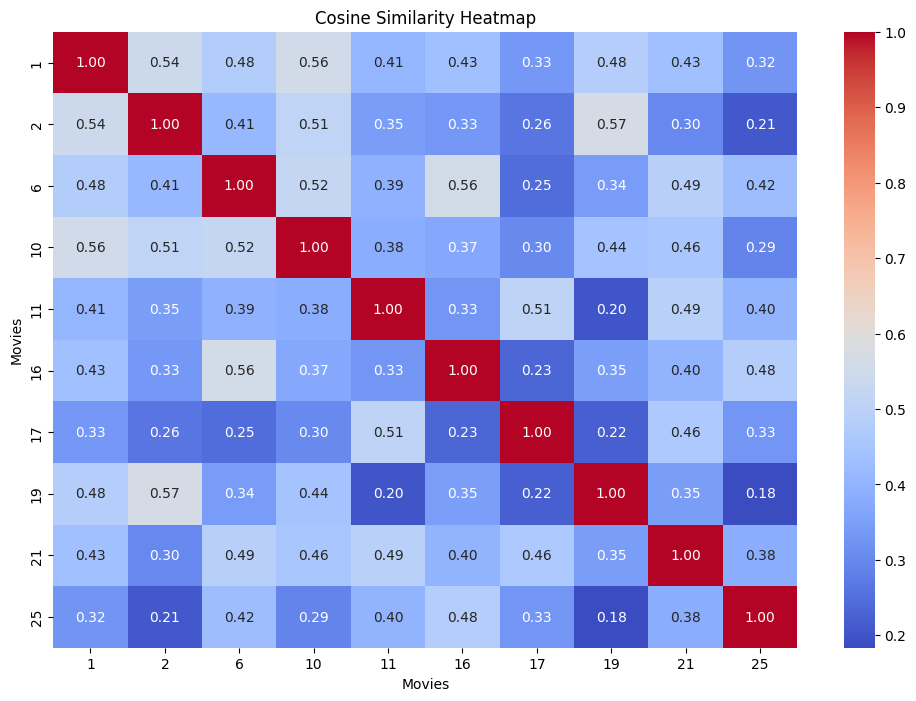

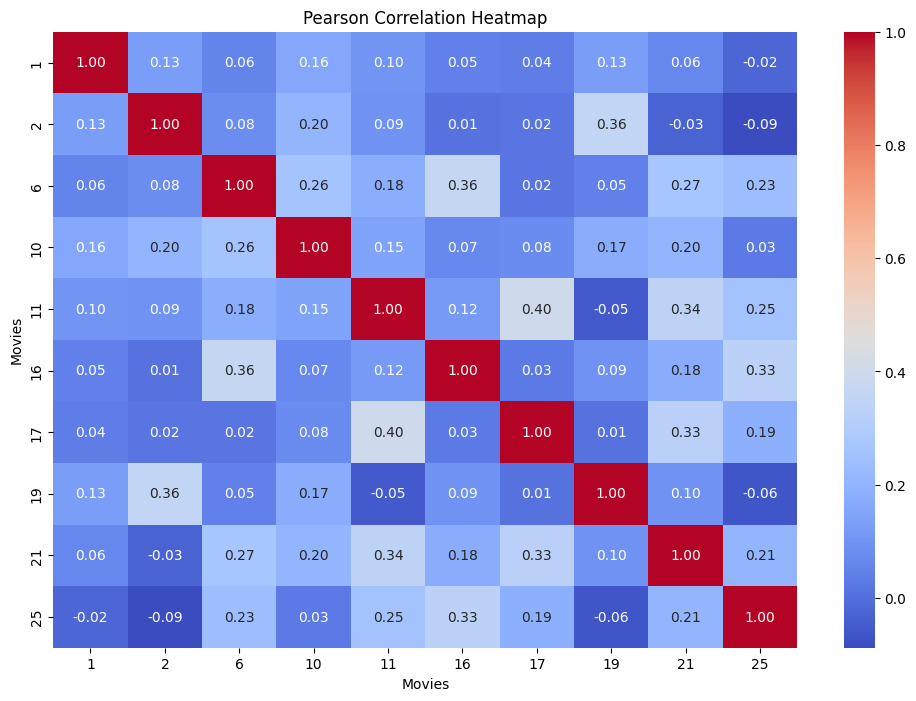

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_similarity_heatmap(similarity_matrix, title="Movie Similarity Heatmap"):
    """
    Plots a heatmap of the movie similarity matrix.

    Parameters:
    similarity_matrix (DataFrame): The movie similarity matrix (cosine or Pearson).
    title (str): The title of the heatmap.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(similarity_matrix.iloc[:10, :10], cmap="coolwarm", annot=True, fmt=".2f")
    plt.title(title)
    plt.xlabel("Movies")
    plt.ylabel("Movies")
    plt.show()

# Example: Plot heatmap for cosine similarity
plot_similarity_heatmap(cosine_similarity_matrix, "Cosine Similarity Heatmap")

# Example: Plot heatmap for Pearson correlation
plot_similarity_heatmap(pearson_similarity_matrix, "Pearson Correlation Heatmap")


# Rating Prediction Functions

##  4.1  Weighted Average of N Nearest Neighbors

In [ ]:
def predict_rating(user_id, movie_id, similarity_matrix, ratings_df, N=5):
    """
    Predicts the rating a user would give to a movie using the weighted average of N nearest neighbors.

    Parameters:
    user_id (int): The ID of the user to predict the rating for.
    movie_id (int): The ID of the movie to predict the rating for.
    similarity_matrix (DataFrame): The movie similarity matrix (cosine or Pearson).
    ratings_df (DataFrame): The filtered ratings dataset.
    N (int): The number of nearest neighbors to use for prediction.

    Returns:
    float: The predicted rating for the movie.
    """
    # Get all movies rated by the user
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    rated_movies = user_ratings['movieId'].tolist()

    if movie_id not in similarity_matrix.index:
        return None  # If the movie is not in the similarity matrix, prediction cannot be made

    # Get similarity scores for the target movie
    similar_movies = similarity_matrix[movie_id].sort_values(ascending=False)

    # Filter out movies the user hasn't rated
    similar_movies = similar_movies.loc[rated_movies]

    # Select top N neighbors
    top_n_neighbors = similar_movies.head(N)

    if top_n_neighbors.empty:
        return None  # No similar movies rated by the user

    # Get the user's ratings for these neighbors
    user_ratings_dict = user_ratings.set_index('movieId')['rating'].to_dict()

    # Compute the weighted average prediction
    numerator = sum(user_ratings_dict[movie] * similarity for movie, similarity in top_n_neighbors.items())
    denominator = sum(abs(similarity) for similarity in top_n_neighbors)

    if denominator == 0:
        return None  # Avoid division by zero

    predicted_rating = numerator / denominator
    return predicted_rating

# Example usage
user_id = 10  # Example user ID
movie_id = 1  # Example movie ID to predict
predicted_rating = predict_rating(user_id, movie_id, cosine_similarity_matrix, filtered_ratings, N=5)
print(f"Predicted rating for user {user_id} on movie {movie_id}: {predicted_rating}")


Predicted rating for user 10 on movie 1: 3.1373207885081613


## Popularity-Based Weighted Average

In [ ]:
def predict_rating_popularity(user_id, movie_id, similarity_matrix, ratings_df, N=5):
    """
    Predicts the rating a user would give to a movie using a popularity-based weighted average
    of N nearest neighbors, favoring movies with more ratings.

    Parameters:
    user_id (int): The ID of the user to predict the rating for.
    movie_id (int): The ID of the movie to predict the rating for.
    similarity_matrix (DataFrame): The movie similarity matrix (cosine or Pearson).
    ratings_df (DataFrame): The filtered ratings dataset.
    N (int): The number of nearest neighbors to use for prediction.

    Returns:
    float: The predicted rating for the movie.
    """
    # Get all movies rated by the user
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    rated_movies = user_ratings['movieId'].tolist()

    if movie_id not in similarity_matrix.index:
        return None  # If the movie is not in the similarity matrix, prediction cannot be made

    # Get similarity scores for the target movie
    similar_movies = similarity_matrix[movie_id].sort_values(ascending=False)

    # Filter out movies the user hasn't rated
    similar_movies = similar_movies.loc[rated_movies]

    # Select top N neighbors
    top_n_neighbors = similar_movies.head(N)

    if top_n_neighbors.empty:
        return None  # No similar movies rated by the user

    # Get the user's ratings and the number of ratings for each neighbor
    user_ratings_dict = user_ratings.set_index('movieId')['rating'].to_dict()
    movie_popularity = ratings_df['movieId'].value_counts().to_dict()

    # Compute the weighted average prediction, factoring in popularity
    numerator = sum(
        user_ratings_dict[movie] * similarity * movie_popularity[movie]
        for movie, similarity in top_n_neighbors.items()
    )
    denominator = sum(
        abs(similarity) * movie_popularity[movie] for movie, similarity in top_n_neighbors.items()
    )

    if denominator == 0:
        return None  # Avoid division by zero

    predicted_rating = numerator / denominator
    return predicted_rating

# Example usage
predicted_rating_popularity = predict_rating_popularity(user_id=10, movie_id=1,
                                                        similarity_matrix=cosine_similarity_matrix,
                                                        ratings_df=filtered_ratings, N=5)
print(f"Predicted rating for user 10 on movie 1 using popularity-based weighting: {predicted_rating_popularity}")


Predicted rating for user 10 on movie 1 using popularity-based weighting: 2.8692603473253437


## Low-Popularity Favoring Weighted Average

In [ ]:
def predict_rating_low_popularity(user_id, movie_id, similarity_matrix, ratings_df, N=5):
    """
    Predicts the rating a user would give to a movie using a low-popularity favoring weighted average
    of N nearest neighbors, where less popular movies have greater influence.

    Parameters:
    user_id (int): The ID of the user to predict the rating for.
    movie_id (int): The ID of the movie to predict the rating for.
    similarity_matrix (DataFrame): The movie similarity matrix (cosine or Pearson).
    ratings_df (DataFrame): The filtered ratings dataset.
    N (int): The number of nearest neighbors to use for prediction.

    Returns:
    float: The predicted rating for the movie.
    """
    # Get all movies rated by the user
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    rated_movies = user_ratings['movieId'].tolist()

    if movie_id not in similarity_matrix.index:
        return None  # If the movie is not in the similarity matrix, prediction cannot be made

    # Get similarity scores for the target movie
    similar_movies = similarity_matrix[movie_id].sort_values(ascending=False)

    # Filter out movies the user hasn't rated
    similar_movies = similar_movies.loc[rated_movies]

    # Select top N neighbors
    top_n_neighbors = similar_movies.head(N)

    if top_n_neighbors.empty:
        return None  # No similar movies rated by the user

    # Get the user's ratings and the number of ratings for each neighbor
    user_ratings_dict = user_ratings.set_index('movieId')['rating'].to_dict()
    movie_popularity = ratings_df['movieId'].value_counts().to_dict()

    # Compute the weighted average prediction, giving more weight to less popular movies
    numerator = sum(
        user_ratings_dict[movie] * similarity * (1 / (1 + movie_popularity[movie]))
        for movie, similarity in top_n_neighbors.items()
    )
    denominator = sum(
        abs(similarity) * (1 / (1 + movie_popularity[movie])) for movie, similarity in top_n_neighbors.items()
    )

    if denominator == 0:
        return None  # Avoid division by zero

    predicted_rating = numerator / denominator
    return predicted_rating

# Example usage
predicted_rating_low_popularity = predict_rating_low_popularity(user_id=10, movie_id=1,
                                                                similarity_matrix=cosine_similarity_matrix,
                                                                ratings_df=filtered_ratings, N=5)
print(f"Predicted rating for user 10 on movie 1 using low-popularity weighting: {predicted_rating_low_popularity}")


Predicted rating for user 10 on movie 1 using low-popularity weighting: 3.4209247257001087


# Experimental Setup and Comparisons

In [ ]:
from sklearn.metrics import mean_absolute_error, precision_score, recall_score, confusion_matrix

def evaluate_recommendation_system(ratings_df, similarity_matrix, N, train_percentage,
                                   prediction_function, M=None, M_prime=None, k_folds=5):
    """
    Performs K-Fold Cross-Validation to evaluate the recommendation system using MAE, Precision, and Recall,
    while also computing and returning matrix density information.

    Parameters:
    ratings_df (DataFrame): The ratings dataset (filtered or unfiltered).
    similarity_matrix (DataFrame): The movie similarity matrix (cosine or Pearson).
    N (int): The number of nearest neighbors for prediction.
    train_percentage (float): The percentage of data used for training (e.g., 80 for 80%).
    prediction_function (function): The rating prediction function to use.
    M (int, optional): Minimum number of ratings per movie for filtering.
    M_prime (int, optional): Minimum number of ratings per user for filtering.
    k_folds (int, optional): Number of folds for cross-validation (default is 5).

    Returns:
    dict: Dictionary containing the evaluation metrics (MAE, Precision, Recall, Confusion Matrix, Matrix Density).
    """

    # Apply filtering if M and M' are specified
    if M:
        movie_counts = ratings_df['movieId'].value_counts()
        filtered_movies = movie_counts[movie_counts >= M].index
        ratings_df = ratings_df[ratings_df['movieId'].isin(filtered_movies)]

         # ✅ Fix KeyError: Ensure similarity matrix only contains valid movie IDs
        filtered_movie_ids = ratings_df['movieId'].unique()
        similarity_matrix = similarity_matrix.reindex(index=filtered_movie_ids, columns=filtered_movie_ids, fill_value=0)

    if M_prime:
        user_counts = ratings_df['userId'].value_counts()
        filtered_users = user_counts[user_counts >= M_prime].index
        ratings_df = ratings_df[ratings_df['userId'].isin(filtered_users)]

        # ✅ Fix KeyError: Ensure similarity matrix only contains movies that still have ratings AFTER user filtering
        remaining_movies_after_user_filtering = ratings_df['movieId'].unique()
        similarity_matrix = similarity_matrix.reindex(index=remaining_movies_after_user_filtering, columns=remaining_movies_after_user_filtering, fill_value=0)



    # Compute matrix density after filtering
    def calculate_matrix_density(filtered_df):
        num_users = filtered_df['userId'].nunique()
        num_movies = filtered_df['movieId'].nunique()
        num_ratings = len(filtered_df)
        density = num_ratings / (num_users * num_movies) if (num_users * num_movies) > 0 else 0
        return density, num_users, num_movies, num_ratings

    density, total_users, total_movies, total_ratings = calculate_matrix_density(ratings_df)

    # Shuffle the data and create folds
    ratings_df = ratings_df.sample(frac=1, random_state=42).reset_index(drop=True)
    fold_size = len(ratings_df) // k_folds
    folds = [ratings_df.iloc[i * fold_size: (i + 1) * fold_size] for i in range(k_folds)]

    # Initialize lists to store evaluation metrics
    mae_scores, precision_scores, recall_scores = [], [], []
    all_true_labels, all_predicted_labels = [], []

    # Perform K-Fold Cross-Validation
    for i in range(k_folds):
        # Split data into training and testing sets
        test_set = folds[i]
        train_set = pd.concat(folds[:i] + folds[i+1:])

        # Get user mean ratings for classification threshold
        user_mean_ratings = train_set.groupby('userId')['rating'].mean().to_dict()

        # Store true and predicted values for binary classification metrics
        true_labels, predicted_labels = [], []
        predicted_ratings, actual_ratings = [], []

        for _, row in test_set.iterrows():
            user_id, movie_id, true_rating = row['userId'], row['movieId'], row['rating']

            # Skip users who are not in the training set
            if user_id not in user_mean_ratings:
                continue

            # Predict rating using the selected rating function
            predicted_rating = prediction_function(user_id, movie_id, similarity_matrix, train_set, N)

            if predicted_rating is not None:
                predicted_ratings.append(predicted_rating)
                actual_ratings.append(true_rating)

                # Determine relevance based on user mean rating
                user_threshold = user_mean_ratings[user_id]
                true_labels.append(1 if true_rating >= user_threshold else 0)
                predicted_labels.append(1 if predicted_rating >= user_threshold else 0)

        # Append collected labels for confusion matrix
        all_true_labels.extend(true_labels)
        all_predicted_labels.extend(predicted_labels)

        # Compute MAE
        if predicted_ratings:  # Avoid error if list is empty
            mae = mean_absolute_error(actual_ratings, predicted_ratings)
            mae_scores.append(mae)

        # Compute Precision and Recall
        if true_labels:  # Ensure there are labels to calculate metrics
            precision = precision_score(true_labels, predicted_labels, average='macro', zero_division=0)
            recall = recall_score(true_labels, predicted_labels, average='macro', zero_division=0)
            precision_scores.append(precision)
            recall_scores.append(recall)

    # Compute final averaged results
    results = {
        "Mean Absolute Error (MAE)": np.mean(mae_scores) if mae_scores else None,
        "Macro Precision": np.mean(precision_scores) if precision_scores else None,
        "Macro Recall": np.mean(recall_scores) if recall_scores else None,
        "Confusion Matrix": confusion_matrix(all_true_labels, all_predicted_labels).tolist() if all_true_labels else None,
        "Matrix Density": density,
        "Total Users": total_users,
        "Total Movies": total_movies,
        "Total Ratings": total_ratings
    }

    return results


In [ ]:
def get_k_folds_from_T(train_percentage):
    """
    Determines the number of K folds needed to achieve the desired train-test split.

    Parameters:
    train_percentage (int): Desired percentage of data for training (e.g., 50, 70, 90).

    Returns:
    int: Number of folds for K-Fold Cross-Validation.
    """
    if train_percentage == 50:
        return 2  # 1 fold for testing (50%), 1 for training (50%)
    elif train_percentage == 70:
        return 3  # 1 fold for testing (~33%), 2 folds for training (~66-70%)
    elif train_percentage == 90:
        return 10  # 1 fold for testing (10%), 9 folds for training (90%)
    else:
        return 5  # Default to 5-fold cross-validation (80/20 split)

# Example: Selecting K-Folds for T=70%
T = 70  # Desired training percentage
k_folds = get_k_folds_from_T(T)
print(f"Using {k_folds}-Fold CV to achieve a {T}% train / {100-T}% test split.")


Using 3-Fold CV to achieve a 70% train / 30% test split.


In [ ]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, precision_score, recall_score

# Define experiment parameters
N_values = [20, 30, 50, 70, 90]  # Different values of N to test
T_values_exp1 = [80]  # Fixed training percentage for first experiment
T_values_exp2 = [50, 70, 90]  # Different training set sizes for second experiment
M_values = [20, 40, 60]  # Different values for minimum ratings per movie
M_prime_values = [20, 40, 60]  # Different values for minimum ratings per user



# List of prediction functions
prediction_functions = [predict_rating, predict_rating_popularity, predict_rating_low_popularity]

In [ ]:


# Experiment 1: No filtering, T=80%, compare 5 different N values for both similarity methods and all 3 prediction functions
experiment_1_results = {}
for N in N_values:
    for similarity_matrix, sim_name in zip([cosine_similarity_matrix, pearson_similarity_matrix], ["Cosine", "Pearson"]):
        for pred_func in prediction_functions:
            key = f"Exp1 - N={N} - {sim_name} - {pred_func.__name__}"
            experiment_1_results[key] = evaluate_recommendation_system(
                ratings_df=filtered_ratings, similarity_matrix=similarity_matrix,
                N=N, train_percentage=80, prediction_function=pred_func,
                M=None, M_prime=None, k_folds=5
            )

# Display results
# Display the results in text format
print("Experiment 1 Results:\n", pd.DataFrame.from_dict(experiment_1_results, orient='index'))



Experiment 1 Results:
                                                     Mean Absolute Error (MAE)  \
Exp1 - N=20 - Cosine - predict_rating                                0.710353   
Exp1 - N=20 - Cosine - predict_rating_popularity                     0.731686   
Exp1 - N=20 - Cosine - predict_rating_low_popul...                   0.724534   
Exp1 - N=20 - Pearson - predict_rating                               0.704185   
Exp1 - N=20 - Pearson - predict_rating_popularity                    0.722802   
Exp1 - N=20 - Pearson - predict_rating_low_popu...                   0.721456   
Exp1 - N=30 - Cosine - predict_rating                                0.705276   
Exp1 - N=30 - Cosine - predict_rating_popularity                     0.721994   
Exp1 - N=30 - Cosine - predict_rating_low_popul...                   0.718414   
Exp1 - N=30 - Pearson - predict_rating                               0.698004   
Exp1 - N=30 - Pearson - predict_rating_popularity                    0.711261   
Exp1 

In [ ]:
# Identify the best N value based on lowest MAE
best_N = min(N_values, key=lambda N: np.mean([experiment_1_results[f"Exp1 - N={N} - Cosine - predict_rating"]["Mean Absolute Error (MAE)"],
                                              experiment_1_results[f"Exp1 - N={N} - Pearson - predict_rating"]["Mean Absolute Error (MAE)"]]))

# Experiment 2: No filtering, use the best N, compare T=50%, 70%, 90% for both similarity methods and all 3 prediction functions
experiment_2_results = {}
for T in T_values_exp2:
    for similarity_matrix, sim_name in zip([cosine_similarity_matrix, pearson_similarity_matrix], ["Cosine", "Pearson"]):
        for pred_func in prediction_functions:
            key = f"Exp2 - T={T} - N={best_N} - {sim_name} - {pred_func.__name__}"
            experiment_2_results[key] = evaluate_recommendation_system(
                ratings_df=filtered_ratings, similarity_matrix=similarity_matrix,
                N=best_N, train_percentage=T, prediction_function=pred_func,
                M=None, M_prime=None, k_folds=get_k_folds_from_T(T)
            )
print("\nExperiment 2 Results:\n", pd.DataFrame.from_dict(experiment_2_results, orient='index'))


Experiment 2 Results:
                                                     Mean Absolute Error (MAE)  \
Exp2 - T=50 - N=90 - Cosine - predict_rating                         0.700092   
Exp2 - T=50 - N=90 - Cosine - predict_rating_po...                   0.711210   
Exp2 - T=50 - N=90 - Cosine - predict_rating_lo...                   0.713483   
Exp2 - T=50 - N=90 - Pearson - predict_rating                        0.691410   
Exp2 - T=50 - N=90 - Pearson - predict_rating_p...                   0.697754   
Exp2 - T=50 - N=90 - Pearson - predict_rating_l...                   0.707569   
Exp2 - T=70 - N=90 - Cosine - predict_rating                         0.699532   
Exp2 - T=70 - N=90 - Cosine - predict_rating_po...                   0.710496   
Exp2 - T=70 - N=90 - Cosine - predict_rating_lo...                   0.712586   
Exp2 - T=70 - N=90 - Pearson - predict_rating                        0.690644   
Exp2 - T=70 - N=90 - Pearson - predict_rating_p...                   0.696912   
Exp2

In [ ]:
# Experiment 3: Test different M and M' values, using the best N and T=80%
experiment_3_results = {}
best_N = 90  # Hard coded for this experiment, should take best_N from previous experiments

# Step 1: Filter Only by M (Minimum Ratings per Movie)
for M in M_values:
    for similarity_matrix, sim_name in zip([cosine_similarity_matrix, pearson_similarity_matrix], ["Cosine", "Pearson"]):
        for pred_func in prediction_functions:
            key = f"Exp3 - No User Filter, M={M} - N={best_N} - {sim_name} - {pred_func.__name__}"
            experiment_3_results[key] = evaluate_recommendation_system(
                ratings_df=ratings, similarity_matrix=similarity_matrix,
                N=best_N, train_percentage=80, prediction_function=pred_func,
                M=M, M_prime=None, k_folds=get_k_folds_from_T(80)  # Apply only M
            )


# Step 2: Filter Only by M' (Minimum Ratings per User)
for M_prime in M_prime_values:
    for similarity_matrix, sim_name in zip([cosine_similarity_matrix, pearson_similarity_matrix], ["Cosine", "Pearson"]):
        for pred_func in prediction_functions:
            key = f"Exp3 - No Movie Filter, M'={M_prime} - N={best_N} - {sim_name} - {pred_func.__name__}"
            experiment_3_results[key] = evaluate_recommendation_system(
                ratings_df=ratings, similarity_matrix=similarity_matrix,
                N=best_N, train_percentage=80, prediction_function=pred_func,
                M=None, M_prime=M_prime, k_folds=get_k_folds_from_T(80)  # Apply only M'
            )



print("\nExperiment 3 Results:\n",pd.DataFrame.from_dict(experiment_3_results, orient='index'))





Experiment 3 Results:
                                                     Mean Absolute Error (MAE)  \
Exp3 - No User Filter, M=20 - N=90 - Cosine - p...                   0.684284   
Exp3 - No User Filter, M=20 - N=90 - Cosine - p...                   0.687184   
Exp3 - No User Filter, M=20 - N=90 - Cosine - p...                   0.690232   
Exp3 - No User Filter, M=20 - N=90 - Pearson - ...                   0.763686   
Exp3 - No User Filter, M=20 - N=90 - Pearson - ...                   0.755687   
Exp3 - No User Filter, M=20 - N=90 - Pearson - ...                   0.783708   
Exp3 - No User Filter, M=40 - N=90 - Cosine - p...                   0.683059   
Exp3 - No User Filter, M=40 - N=90 - Cosine - p...                   0.685076   
Exp3 - No User Filter, M=40 - N=90 - Cosine - p...                   0.688944   
Exp3 - No User Filter, M=40 - N=90 - Pearson - ...                   0.759582   
Exp3 - No User Filter, M=40 - N=90 - Pearson - ...                   0.749787   
Exp3

The results of the experiments were not saved so to take the data i had to hard code them in the script to save hours recalculating the results


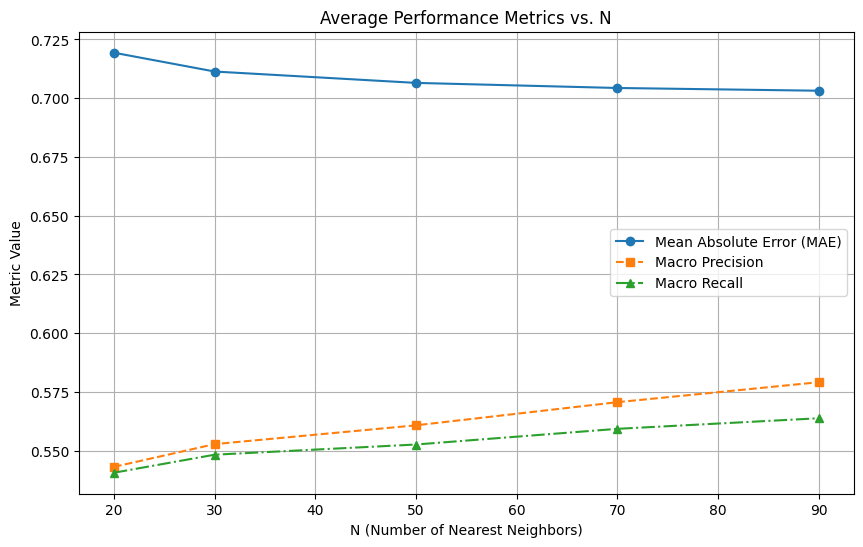

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the experiment data
data = {
    "N": [20, 20, 20, 20, 20, 20, 30, 30, 30, 30, 30, 30, 50, 50, 50, 50, 50, 50, 70, 70, 70, 70, 70, 70, 90, 90, 90, 90, 90, 90],
    "Predict Function": [
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
    ],
    "MAE": [0.71, 0.732, 0.725, 0.704, 0.723, 0.722, 0.705, 0.722, 0.718, 0.698, 0.711, 0.714,
            0.703, 0.714, 0.716, 0.694, 0.702, 0.71, 0.701, 0.712, 0.714, 0.692, 0.699, 0.708,
            0.7, 0.711, 0.713, 0.691, 0.697, 0.707],
    "Precision": [0.547, 0.523, 0.534, 0.564, 0.543, 0.548, 0.562, 0.532, 0.538, 0.578, 0.554, 0.553,
                  0.57, 0.533, 0.543, 0.592, 0.567, 0.56, 0.59, 0.537, 0.548, 0.608, 0.575, 0.566,
                  0.596, 0.551, 0.554, 0.616, 0.585, 0.573],
    "Recall": [0.546, 0.518, 0.533, 0.564, 0.537, 0.546, 0.56, 0.523, 0.535, 0.579, 0.543, 0.55,
               0.567, 0.519, 0.538, 0.592, 0.547, 0.553, 0.583, 0.519, 0.541, 0.607, 0.549, 0.557,
               0.586, 0.524, 0.545, 0.614, 0.553, 0.561]
}

df = pd.DataFrame(data)

# Compute the average of each metric per N value
avg_metrics = df.groupby("N")[["MAE", "Precision", "Recall"]].mean().reset_index()

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.plot(avg_metrics["N"], avg_metrics["MAE"], marker='o', linestyle='-', label="Mean Absolute Error (MAE)")
plt.plot(avg_metrics["N"], avg_metrics["Precision"], marker='s', linestyle='--', label="Macro Precision")
plt.plot(avg_metrics["N"], avg_metrics["Recall"], marker='^', linestyle='-.', label="Macro Recall")

# Labeling the graph
plt.xlabel("N (Number of Nearest Neighbors)")
plt.ylabel("Metric Value")
plt.title("Average Performance Metrics vs. N")
plt.legend()
plt.grid()

# Show the plot
plt.show()


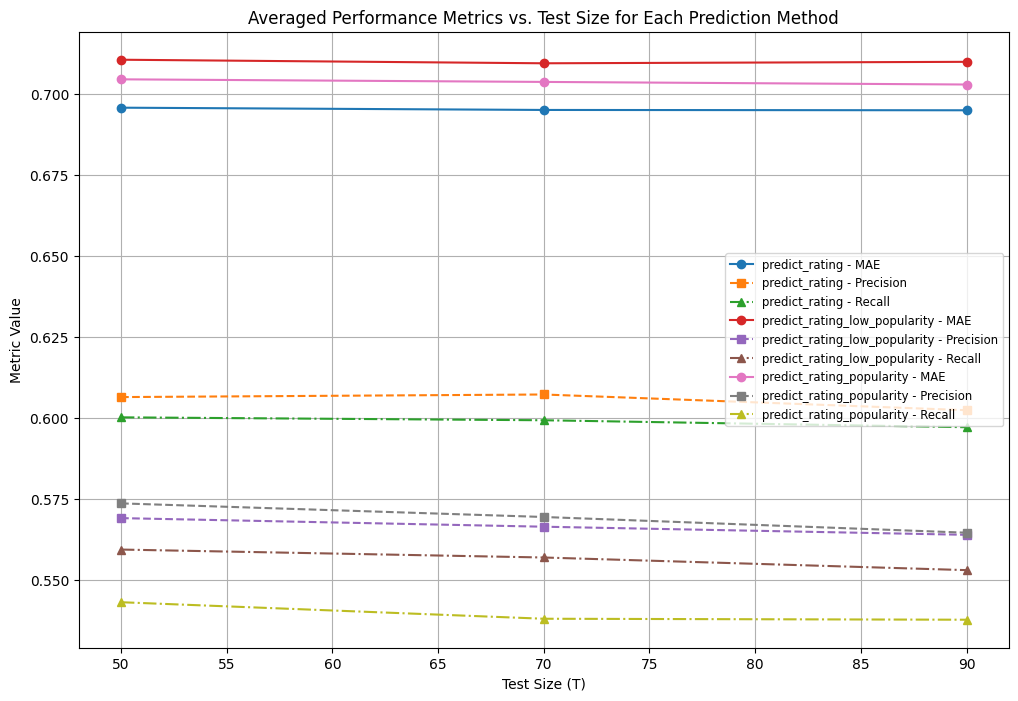

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Define the experiment data
raw_data = """
Exp2 - T=50 - N=90 - Cosine - predict_rating,0.7001,0.5977,0.587
Exp2 - T=50 - N=90 - Cosine - predict_rating_popularity,0.7112,0.5578,0.5288
Exp2 - T=50 - N=90 - Cosine - predict_rating_low_popularity,0.7135,0.5618,0.5531
Exp2 - T=50 - N=90 - Pearson - predict_rating,0.6914,0.6152,0.6134
Exp2 - T=50 - N=90 - Pearson - predict_rating_popularity,0.6978,0.5895,0.5575
Exp2 - T=50 - N=90 - Pearson - predict_rating_low_popularity,0.7076,0.5764,0.5657
Exp2 - T=70 - N=90 - Cosine - predict_rating,0.6995,0.5989,0.5861
Exp2 - T=70 - N=90 - Cosine - predict_rating_popularity,0.7105,0.5507,0.5231
Exp2 - T=70 - N=90 - Cosine - predict_rating_low_popularity,0.7126,0.558,0.5496
Exp2 - T=70 - N=90 - Pearson - predict_rating,0.6906,0.6156,0.6125
Exp2 - T=70 - N=90 - Pearson - predict_rating_popularity,0.6969,0.5882,0.553
Exp2 - T=70 - N=90 - Pearson - predict_rating_low_popularity,0.7063,0.5749,0.5643
Exp2 - T=90 - N=90 - Cosine - predict_rating,0.6995,0.5926,0.5837
Exp2 - T=90 - N=90 - Cosine - predict_rating_popularity,0.7098,0.5485,0.524
Exp2 - T=90 - N=90 - Cosine - predict_rating_low_popularity,0.7132,0.5551,0.5455
Exp2 - T=90 - N=90 - Pearson - predict_rating,0.6904,0.6122,0.6106
Exp2 - T=90 - N=90 - Pearson - predict_rating_popularity,0.696,0.5807,0.5515
Exp2 - T=90 - N=90 - Pearson - predict_rating_low_popularity,0.7066,0.5728,0.5606
"""

# Process the data
data = []
for line in raw_data.strip().split("\n"):
    parts = line.split(",")
    match = re.search(r'T=(\d+)', parts[0])
    if match:
        test_size = int(match.group(1))
    method = re.search(r'predict_\w+', parts[0]).group()
    mae, precision, recall = map(float, parts[1:])
    data.append([test_size, method, mae, precision, recall])

df = pd.DataFrame(data, columns=["Test Size", "Method", "MAE", "Precision", "Recall"])

# Compute averages across Cosine and Pearson for each predict function
df_avg = df.groupby(["Test Size", "Method"]).mean().reset_index()

# Plot the metrics
plt.figure(figsize=(12, 8))
for method in df_avg["Method"].unique():
    subset = df_avg[df_avg["Method"] == method]
    plt.plot(subset["Test Size"], subset["MAE"], marker='o', linestyle='-', label=f"{method} - MAE")
    plt.plot(subset["Test Size"], subset["Precision"], marker='s', linestyle='--', label=f"{method} - Precision")
    plt.plot(subset["Test Size"], subset["Recall"], marker='^', linestyle='-.', label=f"{method} - Recall")

# Labeling the graph
plt.xlabel("Test Size (T)")
plt.ylabel("Metric Value")
plt.title("Averaged Performance Metrics vs. Test Size for Each Prediction Method")
plt.legend(loc='best', fontsize='small')
plt.grid()

# Show the plot
plt.show()


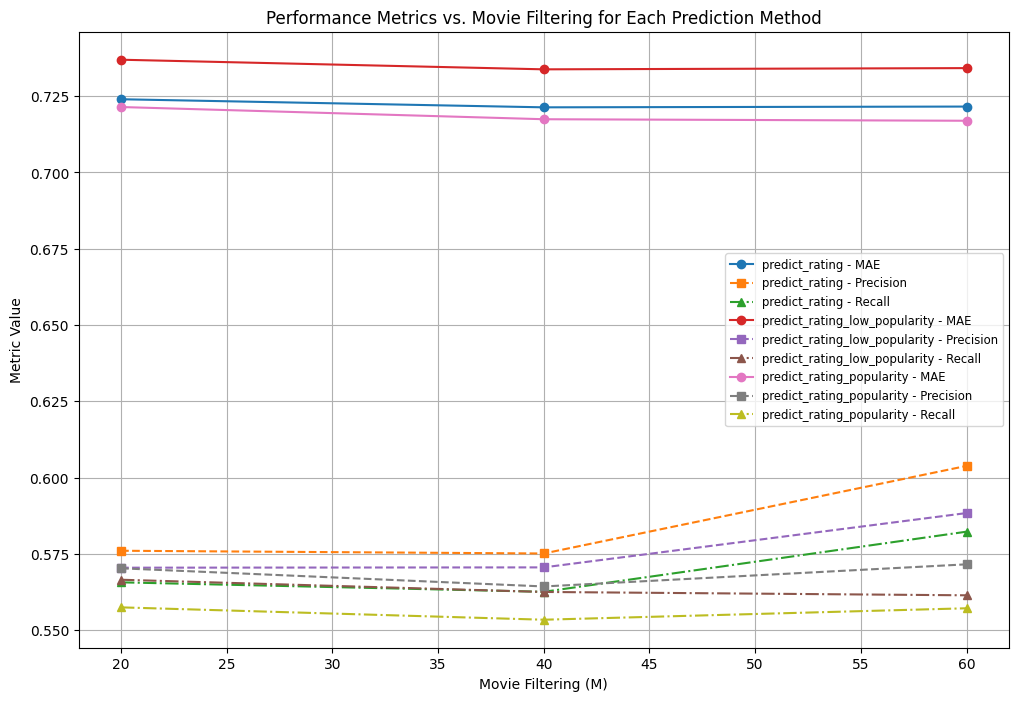

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Directly define the DataFrame
data = {
    "Matrix Size": [20, 20, 20, 20, 20, 20, 40, 40, 40, 40, 40, 40, 60, 60, 60, 60, 60, 60],
    "Method": [
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity"
    ],
    "MAE": [0.6843, 0.6872, 0.6902, 0.7637, 0.7557, 0.7837,
            0.6831, 0.6851, 0.6889, 0.7596, 0.7498, 0.7787,
            0.6836, 0.6851, 0.6895, 0.7596, 0.7488, 0.7789],
    "Precision": [0.563, 0.5537, 0.5604, 0.5891, 0.5869, 0.5806,
                  0.5573, 0.5417, 0.5527, 0.593, 0.587, 0.5885,
                  0.5979, 0.5438, 0.5712, 0.6098, 0.5994, 0.6056],
    "Recall": [0.54, 0.5244, 0.5545, 0.5914, 0.5906, 0.5786,
               0.538, 0.5188, 0.5525, 0.5872, 0.5881, 0.5726,
               0.5815, 0.5209, 0.5605, 0.5831, 0.5935, 0.5624]
}

# Create DataFrame
df = pd.DataFrame(data)

# Compute averages across methods
df_avg = df.groupby(["Matrix Size", "Method"]).mean().reset_index()

# Ensure df_avg is not empty before plotting
if df_avg.empty:
    print("Error: Averaged DataFrame is empty. No data to plot.")
else:
    # Plot the metrics
    plt.figure(figsize=(12, 8))
    methods = df_avg["Method"].unique()
    for method in methods:
        subset = df_avg[df_avg["Method"] == method]
        plt.plot(subset["Matrix Size"], subset["MAE"], marker='o', linestyle='-', label=f"{method} - MAE")
        plt.plot(subset["Matrix Size"], subset["Precision"], marker='s', linestyle='--', label=f"{method} - Precision")
        plt.plot(subset["Matrix Size"], subset["Recall"], marker='^', linestyle='-.', label=f"{method} - Recall")

    # Labeling the graph
    plt.xlabel("Movie Filtering (M)")
    plt.ylabel("Metric Value")
    plt.title("Performance Metrics vs. Movie Filtering for Each Prediction Method")
    plt.legend(loc='best', fontsize='small')
    plt.grid()

    # Show the plot
    plt.show()


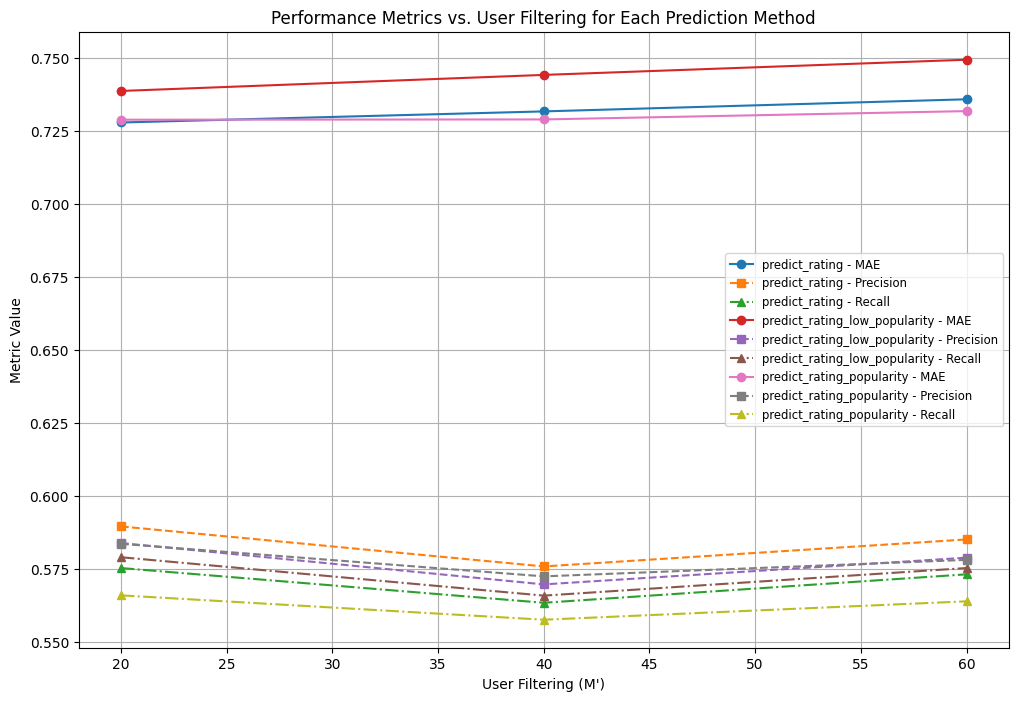

In [13]:
# Define the structured DataFrame from the provided data
data = {
    "Matrix Size": [20, 20, 20, 20, 20, 20, 40, 40, 40, 40, 40, 40, 60, 60, 60, 60, 60, 60],
    "Method": [
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity",
        "predict_rating", "predict_rating_popularity", "predict_rating_low_popularity"
    ],
    "MAE": [0.6876, 0.6921, 0.6925, 0.7681, 0.7655, 0.7848,
            0.6879, 0.689, 0.6943, 0.7754, 0.7688, 0.794,
            0.6871, 0.6886, 0.6929, 0.7845, 0.7749, 0.8058],
    "Precision": [0.5835, 0.5749, 0.5745, 0.5955, 0.5922, 0.5931,
                  0.567, 0.5592, 0.558, 0.5846, 0.5856, 0.5813,
                  0.578, 0.5652, 0.5696, 0.5921, 0.5909, 0.588],
    "Recall": [0.5489, 0.5359, 0.5593, 0.6016, 0.5959, 0.5986,
               0.5364, 0.5257, 0.5455, 0.5903, 0.5894, 0.5861,
               0.5477, 0.5315, 0.5582, 0.5985, 0.5962, 0.5923]
}

# Create DataFrame
df = pd.DataFrame(data)

# Compute averages across methods
df_avg = df.groupby(["Matrix Size", "Method"]).mean().reset_index()

# Ensure df_avg is not empty before plotting
if df_avg.empty:
    print("Error: Averaged DataFrame is empty. No data to plot.")
else:
    # Plot the metrics
    plt.figure(figsize=(12, 8))
    methods = df_avg["Method"].unique()
    for method in methods:
        subset = df_avg[df_avg["Method"] == method]
        plt.plot(subset["Matrix Size"], subset["MAE"], marker='o', linestyle='-', label=f"{method} - MAE")
        plt.plot(subset["Matrix Size"], subset["Precision"], marker='s', linestyle='--', label=f"{method} - Precision")
        plt.plot(subset["Matrix Size"], subset["Recall"], marker='^', linestyle='-.', label=f"{method} - Recall")

    # Labeling the graph
    plt.xlabel("User Filtering (M')")
    plt.ylabel("Metric Value")
    plt.title("Performance Metrics vs. User Filtering for Each Prediction Method")
    plt.legend(loc='best', fontsize='small')
    plt.grid()

    # Show the plot
    plt.show()
